In [35]:
import numpy as np
import time
import cv2
import os

In [2]:
!wget  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip?dl=0

--2024-09-25 06:10:06--  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/z1ltom72vfkw424wgxwvg/state-farm-distracted-driver-detection.zip?rlkey=bydwgjsezgyf0eki4ecb0oeti&dl=0 [following]
--2024-09-25 06:10:06--  https://www.dropbox.com/scl/fi/z1ltom72vfkw424wgxwvg/state-farm-distracted-driver-detection.zip?rlkey=bydwgjsezgyf0eki4ecb0oeti&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb753057e3f686b70f23a232708.dl.dropboxusercontent.com/cd/0/inline/CbM122f22RLDaYYcQwYQunNFecT6E3oTJJpKgHIz_1tZDGwxZ3m6_S0U3jOvQimOU2Vs-lqRwhmc7t8MJriPe1Ip3Sn7rtR3hBY0Zl0eif4M0YPxhORDqnlECfGDjTrDaGc/file# [following]
--2024-09-25 06:1

In [3]:
!unzip state-farm-distracted-driver-detection.zip?dl=0

Archive:  state-farm-distracted-driver-detection.zip?dl=0
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                


In [4]:
!unzip imgs.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/c7/img_56661.jpg  
  inflating: train/c7/img_56699.jpg  
  inflating: train/c7/img_56717.jpg  
  inflating: train/c7/img_56724.jpg  
  inflating: train/c7/img_56768.jpg  
  inflating: train/c7/img_56779.jpg  
  inflating: train/c7/img_56849.jpg  
  inflating: train/c7/img_56899.jpg  
  inflating: train/c7/img_56938.jpg  
  inflating: train/c7/img_5706.jpg   
  inflating: train/c7/img_57076.jpg  
  inflating: train/c7/img_57122.jpg  
  inflating: train/c7/img_57137.jpg  
  inflating: train/c7/img_5715.jpg   
  inflating: train/c7/img_57278.jpg  
  inflating: train/c7/img_57321.jpg  
  inflating: train/c7/img_57345.jpg  
  inflating: train/c7/img_57355.jpg  
  inflating: train/c7/img_5741.jpg   
  inflating: train/c7/img_57433.jpg  
  inflating: train/c7/img_5753.jpg   
  inflating: train/c7/img_57559.jpg  
  inflating: train/c7/img_57594.jpg  
  inflating: train/c7/img_5771.jpg   
  inflating: train/c7/img_57712.jpg  

In [6]:
labelsPath = r'/content/driver_imgs_list.csv'
LABELS = open(labelsPath).read().strip().split("\n")

In [7]:
LABELS

['subject,classname,img',
 'p002,c0,img_44733.jpg',
 'p002,c0,img_72999.jpg',
 'p002,c0,img_25094.jpg',
 'p002,c0,img_69092.jpg',
 'p002,c0,img_92629.jpg',
 'p002,c0,img_3370.jpg',
 'p002,c0,img_67639.jpg',
 'p002,c0,img_58560.jpg',
 'p002,c0,img_35779.jpg',
 'p002,c0,img_10012.jpg',
 'p002,c0,img_70354.jpg',
 'p002,c0,img_54617.jpg',
 'p002,c0,img_26684.jpg',
 'p002,c0,img_82409.jpg',
 'p002,c0,img_5585.jpg',
 'p002,c0,img_19029.jpg',
 'p002,c0,img_40930.jpg',
 'p002,c0,img_31547.jpg',
 'p002,c0,img_87373.jpg',
 'p002,c0,img_10627.jpg',
 'p002,c0,img_66355.jpg',
 'p002,c0,img_97714.jpg',
 'p002,c0,img_37344.jpg',
 'p002,c0,img_54848.jpg',
 'p002,c0,img_59964.jpg',
 'p002,c0,img_70675.jpg',
 'p002,c0,img_43317.jpg',
 'p002,c0,img_13585.jpg',
 'p002,c0,img_63064.jpg',
 'p002,c0,img_91058.jpg',
 'p002,c0,img_79799.jpg',
 'p002,c0,img_18198.jpg',
 'p002,c0,img_55108.jpg',
 'p002,c0,img_87789.jpg',
 'p002,c0,img_11582.jpg',
 'p002,c0,img_24152.jpg',
 'p002,c0,img_28404.jpg',
 'p002,c0,img_

In [8]:
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),dtype="uint8")

In [9]:
!wget https://www.dropbox.com/s/xhi3lh1rvy7celd/yolov3.weights

--2024-09-25 06:17:58--  https://www.dropbox.com/s/xhi3lh1rvy7celd/yolov3.weights
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/gobbnqvlidur0mheh3zbn/yolov3.weights?rlkey=r47tl8pmh61n016ihfs4io710 [following]
--2024-09-25 06:17:58--  https://www.dropbox.com/scl/fi/gobbnqvlidur0mheh3zbn/yolov3.weights?rlkey=r47tl8pmh61n016ihfs4io710
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7f5fd86c6f454b850d9e7355c8.dl.dropboxusercontent.com/cd/0/inline/CbNA8AZmq6jN5iw5av2IjT7_6ZsPIypRVdTxLd6NX3aFi_xumQKVStB0nWpCz_gbfb1BzwimXHqHQEFe9xPqPsJb2CyS72FMoVUwW7l4EeB6lOjTh8-mh6QNJG6xc44zP2QoVzdWZUPVQO0X6j5cAhst/file# [following]
--2024-09-25 06:17:59--  https://uc7f5fd86c6f454b850d9e7355c8.dl.dropboxusercontent.com/cd/0/in

In [10]:
!wget https://www.dropbox.com/s/lb84ueim858rn6v/yolov3.cfg

--2024-09-25 06:18:09--  https://www.dropbox.com/s/lb84ueim858rn6v/yolov3.cfg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/qe3vrg21yofwbzply6b68/yolov3.cfg?rlkey=eoidak6i5m971y8xv3o41hyol [following]
--2024-09-25 06:18:09--  https://www.dropbox.com/scl/fi/qe3vrg21yofwbzply6b68/yolov3.cfg?rlkey=eoidak6i5m971y8xv3o41hyol
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7bb86cdb5241ed2f971fb57e46.dl.dropboxusercontent.com/cd/0/inline/CbMs2AFOg74es4_07u0wCG5dzNrNRXVu2WjdteY7fpYGDZVXKVzPYCL2JYTZwbBq9igdXePDR1fT_x9PKYqPs5322XCgmpQq5V7TYfgHIh0xTutatnx5BmuZoDFM99yMsIb8-_C77dP7sb4VmIYDov92/file# [following]
--2024-09-25 06:18:10--  https://uc7bb86cdb5241ed2f971fb57e46.dl.dropboxusercontent.com/cd/0/inline/CbMs2AF

In [11]:
weightsPath = 'yolov3.weights'
configPath = 'yolov3.cfg'

In [12]:
yolo = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

In [21]:
image = cv2.imread('train/c7/img_58356.jpg')

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

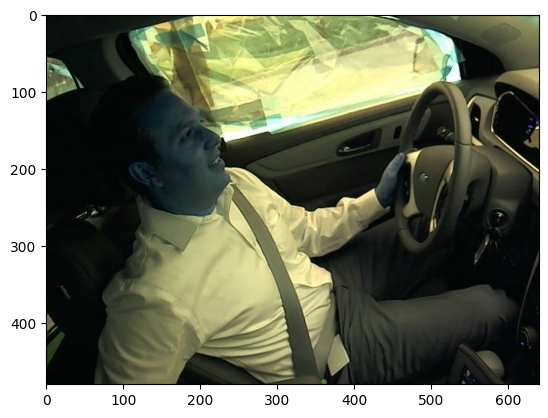

In [23]:
plt.imshow(image)
plt.show()

In [24]:
(H, W) = image.shape[:2]
H,W

(480, 640)

In [39]:
ln = yolo.getLayerNames()
ln = [ln[i - 1] for i in yolo.getUnconnectedOutLayers()]

In [40]:
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),swapRB=True, crop=False)
yolo.setInput(blob)
layerOutputs = yolo.forward(ln)

In [41]:
boxes = []
confidences = []
classIDs = []

In [42]:
for output in layerOutputs:
	# loop over each of the detections
	for detection in output:
		# extract the class ID and confidence (i.e., probability) of
		# the current object detection
		scores = detection[5:]
		classID = np.argmax(scores)
		confidence = scores[classID]

		# filter out weak predictions by ensuring the detected
		# probability is greater than the minimum probability
		if confidence > 0.5:
			# scale the bounding box coordinates back relative to the
			# size of the image, keeping in mind that YOLO actually
			# returns the center (x, y)-coordinates of the bounding
			# box followed by the boxes' width and height
			box = detection[0:4] * np.array([W, H, W, H])
			(centerX, centerY, width, height) = box.astype("int")

			# use the center (x, y)-coordinates to derive the top and
			# and left corner of the bounding box
			x = int(centerX - (width / 2))
			y = int(centerY - (height / 2))

			# update our list of bounding box coordinates, confidences,
			# and class IDs
			boxes.append([x, y, int(width), int(height)])
			confidences.append(float(confidence))
			classIDs.append(classID)

In [43]:
idxs = cv2.dnn.NMSBoxes(boxes, confidences,0.5,0.3)

In [44]:
if len(idxs) > 0:
	# loop over the indexes we are keeping
	for i in idxs.flatten():
		# extract the bounding box coordinates
		(x, y) = (boxes[i][0], boxes[i][1])
		(w, h) = (boxes[i][2], boxes[i][3])

		# draw a bounding box rectangle and label on the image
		color = [int(c) for c in COLORS[classIDs[i]]]
		cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
		text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
		cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
			0.5, color, 2)

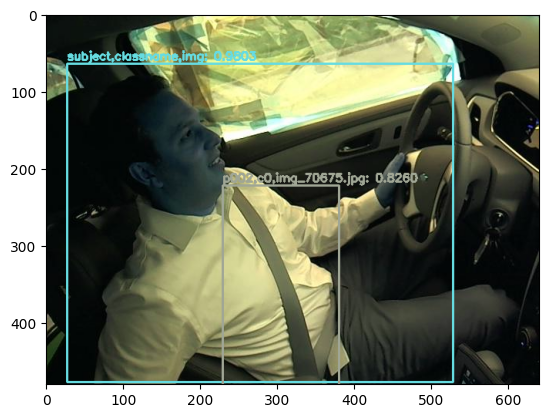

In [45]:
plt.imshow(image)
plt.show()
#shows the image identifying the class c0 which is safe driving.

In [46]:
cv2.imwrite('yolo_result.jpg', image)

True